In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# read in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

# number of classes
k = len(np.unique(y_train))
print(f"number of classes: {k}")

x_train.shape: (60000, 28, 28)
(60000, 28, 28, 1)
number of classes: 10


In [8]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# double the num of feature maps with each conv layer:
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

Epoch 1/2
1875/1875 [==============================] - 88s 47ms/step - loss: 0.5152 - accuracy: 0.8087 - val_loss: 0.3890 - val_accuracy: 0.8528
Epoch 2/2
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3588 - accuracy: 0.8654 - val_loss: 0.3430 - val_accuracy: 0.8737


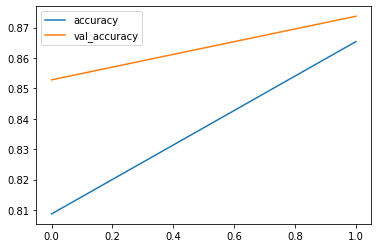

In [9]:
# Compile and fit
# Note: GPU will help a lot here
metrics_list = ['accuracy']
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=metrics_list)
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=2)
    
df_history = pd.DataFrame(history.history)
for metric in metrics_list:
    df_history[[metric, f'val_{metric}']].plot()


In [61]:
y_test_pred = model.predict(x_test)

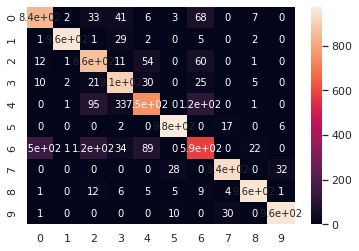

In [71]:
def plot_confusion_matrix(y, y_pred):
    df_confusion_matrix = pd.DataFrame(confusion_matrix(y, y_pred))
    sns.set(font_scale=1.) # for label size
    sns.heatmap(df_confusion_matrix, annot=True, annot_kws={"size": 10}) # font size

def show_misclassified_example(x, y, y_pred):
    misclassified_mask = [y != y_pred]
    #print(y_misclassified)
    i = np.random.choice(x[misclassified_mask].shape[0])
    plt.imshow(x[misclassified_mask][i], cmap='Reds')
    plt.show()
    print(f"y: {y[misclassified_mask][i]}\ny_pred: {y_pred[misclassified_mask][i]}")

plot_confusion_matrix(y_test, np.argmax(y_test_pred, axis=1).astype('uint8'))


<ipython-input-71-49bcf80e80e1>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  i = np.random.choice(x[misclassified_mask].shape[0])
<ipython-input-71-49bcf80e80e1>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.imshow(x[misclassified_mask][i], cmap='Reds')


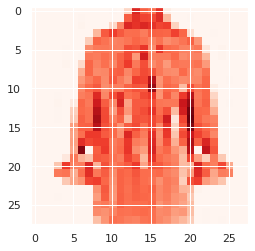

y: 6
y_pred: 4


<ipython-input-71-49bcf80e80e1>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print(f"y: {y[misclassified_mask][i]}\ny_pred: {y_pred[misclassified_mask][i]}")


In [74]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

show_misclassified_example(x_test.reshape(10000,28,28), 
                           y_test, 
                           np.argmax(y_test_pred, axis=1).astype('uint8') )

In [15]:
model.summary() # show the model architecture

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               2626